# **🌱 Plant Disease Detection 🌱**
This notebook builds a multi-class image classifier using PyTorch and CV2.

**Abstract**

 Plant diseases are an important factor in limiting crop yields. The first step in plant disease management is the identification of the disease/pathogen causing the disease. Identification or diagnostic tools include pathological methods that require time and significant investment, and molecular methods for identification. In recent years, nanotechnology has emerged as a new diagnostic tool. Nanotechnology includes nanoconfiguration platforms, nanoimaging and nanopore DNA sequencing, among others.
Tools are available for quality control and plant protection. It can also help farmers prevent diseases at an early stage with rapid detection of plant diseases, so nanotechnology can be used for faster and more accurate diagnosis of plant diseases.

# INTRODUCTION
Finding plant diseases is a crucial challenge in plant pathology and agriculture. The usage of pesticides can be reduced, crop losses can be avoided, and productivity can be increased with timely and precise disease identification in plants. Automated systems for plant disease diagnosis have attracted a lot of attention as a result of developments in computer vision and deep learning. ResNet (Residual Neural Network) is a deep learning architecture that has transformed picture categorization jobs. It was first introduced by Kaiming He et al. in 2015, and since then, it has excelled at a number of computer vision tasks, including detecting plant diseases. ResNet is renowned for its capacity to solve the vanishing gradient problem and train incredibly deep neural networks.

##1.Problem
Identifying the plant disease by looking at the image of the leaf
Plants are crucial to human life and need careful attention. However, we must take into account the fact that they are susceptible to a number of ailments brought on by bacteria, fungus, and specific viruses. In order to prevent disease outbreaks, we should keep an eye on the health of the leaves since they often display the earliest symptoms of a plant illness. Additionally, a detailed examination of the plant leaf reveals other details that aid in the healthy development of our plants. Each year, diseases claim the lives of millions of plants and agricultural products, resulting in losses for the environment as well as for business. According to estimates, weeds, insects, and illnesses cause the loss of between 31 and 42% of all crop products worldwide.

##2. Data

Data we are using is from kaggle

https://www.kaggle.com/datasets/emmarex/plantdisease

In [ ]:
fname = "PlantDiseaseDataset.zip"
!gdown https://drive.google.com/uc?id=1Cc8-RCBg_mSeNMa_ZxY4DEHIZ7FDTDbm -O {fname}
!unzip -o {fname}
!rm {fname}

Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-74

##3. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 15 different Plant Diseases (this means there are 15 different classes).
* There are around 20639 images in the dataset


### Get our workspace ready

* Import necessary tools
* Make sure we're using a GPU ✅

In [ ]:
import numpy as np              # for numerical computations
import pandas as pd             # for working with Panda dataframes
import matplotlib.pyplot as plt # for plotting informations on graph and images using tensors
import torch  as tc                  # Pytorch module
import tensorflow as tf
import statistics
from torchvision import datasets , models
import cv2
import os                         # for working with files
import torch.nn as nn           # for creating  neural networks
from torch.utils.data import DataLoader, random_split, Dataset # for dataloaders
#from PIL import Image           # for checking images
from IPython.display import Image as imgs # for checking images
import torch.nn.functional as F # for functions for calculating loss
import torchvision.transforms as transforms   # for transforming images into tensors
from torchvision.utils import make_grid       # for data checking
from torchvision.datasets import ImageFolder  # for working with classes and images
from torchsummary import summary              # for getting the summary of our model
from torchvision.datasets import MNIST

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tqdm.notebook import trange, tqdm
from PIL import Image


from matplotlib import patches, patheffects
from tempfile import TemporaryDirectory
from pathlib import Path
import json, mimetypes, pdb, requests
import torchvision.models as models
import concurrent
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor, as_completed
from sys import platform as _platform
from functools import partial
from itertools import chain

import os
from torchvision.transforms.functional import to_tensor
import xml.etree.ElementTree as ET
import math
from torch.utils.data import Subset

In [ ]:
# Check for GPU availability
print("GPU", " is available" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU  is available


## 4. Importing data

In [ ]:
data_dir = "/content/PlantVillage"

## 5. Exploring Data

In [ ]:
plant_diseases = os.listdir(data_dir)
print("Total disease classes are: {}".format(len(plant_diseases)))

Total disease classes are: 15


In [ ]:
plant_diseases

['Potato___Late_blight',
 'Potato___healthy',
 'Tomato__Tomato_mosaic_virus',
 'Pepper__bell___healthy',
 'Tomato_Leaf_Mold',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_healthy',
 'Pepper__bell___Bacterial_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato_Septoria_leaf_spot',
 'Potato___Early_blight',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Bacterial_spot']

In [ ]:
plant_dict = {}
for disease in plant_diseases:
    plant_dict[disease] = len(os.listdir(data_dir + '/' + disease))

# Converting the plant_dict dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(plant_dict.values(), index=plant_dict.keys(), columns=["no. of images"])
img_per_class

no. of images
Potato___Late_blight                                  1000
Potato___healthy                                       152
Tomato__Tomato_mosaic_virus                            373
Pepper__bell___healthy                                1478
Tomato_Leaf_Mold                                       952
Tomato__Tomato_YellowLeaf__Curl_Virus                 3209
Tomato_healthy                                        1591
Pepper__bell___Bacterial_spot                          997
Tomato_Spider_mites_Two_spotted_spider_mite           1676
Tomato__Target_Spot                                   1404
Tomato_Septoria_leaf_spot                             1771
Potato___Early_blight                                 1000
Tomato_Early_blight                                   1000
Tomato_Late_blight                                    1909
Tomato_Bacterial_spot                                 2127

In [ ]:
# What's the median number of images per class?
plant_val_list = list(plant_dict.values())
statistics.median(plant_val_list)

1404

In [ ]:
# Total number of images
sum(plant_dict.values())

20639

As we can see that there are 15 classes and over 20 thousand images in our dataset, around 1400 images per class.

Now lets visualize this information

## 6. Visualizing the data
Plotting a bar graph for number of images available for each plant disease and displaying few images from the dataset

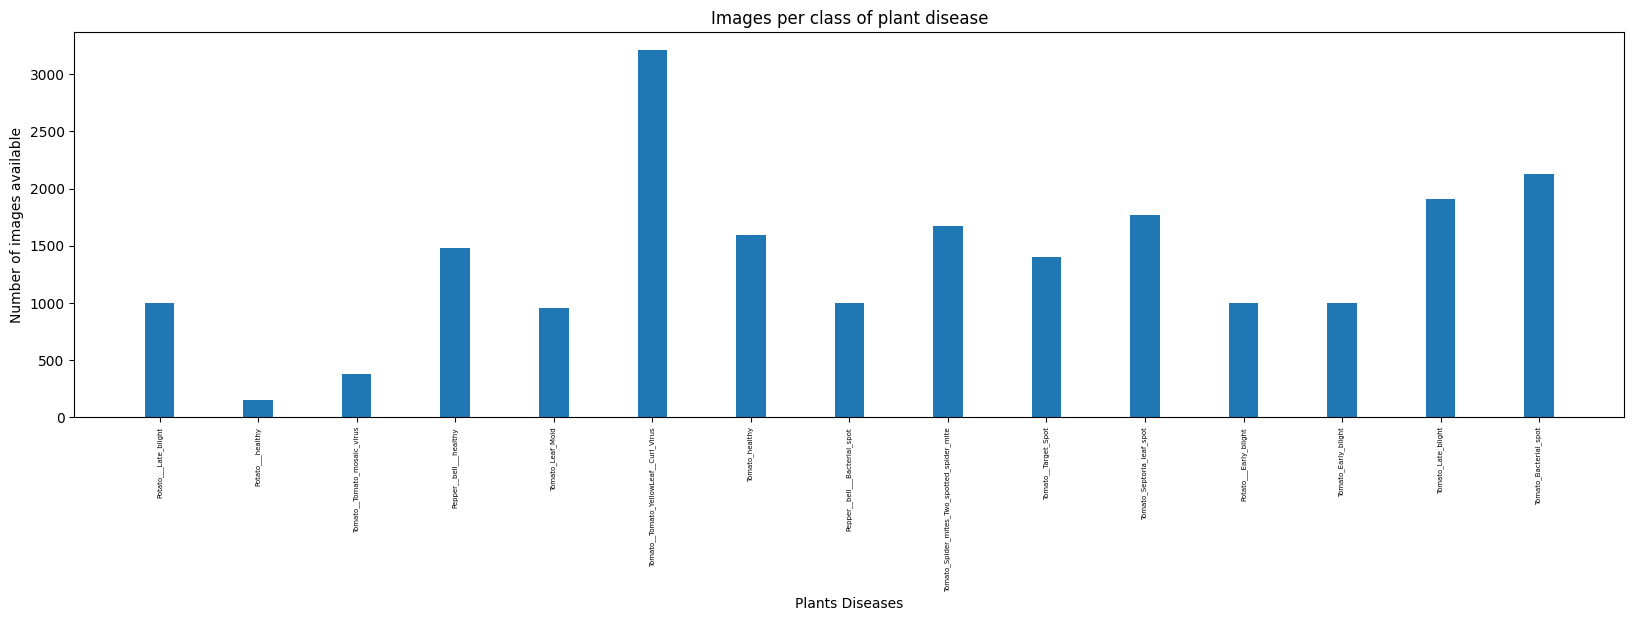

In [ ]:
# Plotting number of images available for each disease
index = [n for n in range(15)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in plant_dict.values()], width=0.3)
plt.xlabel('Plants Diseases', fontsize=10)
plt.ylabel('Number of images available', fontsize=10)
plt.xticks(index, plant_diseases, fontsize=5, rotation=90)
plt.title('Images per class of plant disease');

## in following cell we iterate over files, read one image of each class and plot them including their category name which is name of their files :

In [ ]:
for catg_name in os.listdir(data_dir):
    path = os.path.join(data_dir, catg_name)
    for img in os.listdir(path):
        image = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
        plt.imshow(image)
        plt.title(catg_name)
        plt.axis('off')
        plt.show()

        break

Output hidden; open in https://colab.research.google.com to view.

## 7. Pre-processing
Performing steps to prepare the data for modeling:

1. Data Augmentation

2. Loading the dataset using DataLoader

3. Transforming data to tensors

4. Train-Test Split

In [ ]:
# Data augmantation function

# roatate and add padding
def rotate_pad(im,m=25, borderType=cv2.BORDER_CONSTANT, min_rot=-30, max_rot=30):
  im = np.array(im)
  im_padded = cv2.copyMakeBorder(im, m, m, m, m, borderType)
  rot = np.random.uniform(min_rot, max_rot)
  H,W = im_padded.shape[:2]
  getR = cv2.getRotationMatrix2D((W/2, H/2), rot, 1)
  return Image.fromarray(cv2.warpAffine(im_padded, getR, (W, H)))

#  zooming and croping
def zoom_crop(image):
    zoom_factor = np.random.uniform(1, 1.3)
    h, w = image.size[0], image.size[1]
    new_h, new_w = int(h * zoom_factor), int(w * zoom_factor)
    resized_img = transforms.Resize((new_h, new_w))(image)
    cropped_img = transforms.RandomCrop((h, w))(resized_img)
    return cropped_img



transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.2, hue=0.1)], p=0.4),
    transforms.RandomApply([transforms.Lambda(lambda x: zoom_crop(x))], p=0.3),
    transforms.RandomApply([transforms.Lambda(lambda x: rotate_pad(x))], p=0.3),
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

In [ ]:
def show_img(file_path, ax=None, figsize=(3,3), title=None):
    img = Image.open(file_path)
    im = np.array(img)
    if not ax: _,ax = plt.subplots(1,1,figsize=figsize)
    if len(im.shape)==2: im = np.tile(im[:,:,None], 3)
    ax.imshow(im);
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    if title: ax.set_title(title)
    return ax

In [ ]:
# Loading Dataset and performing transformation on the data
dataset = datasets.ImageFolder(root = data_dir, transform=transform)

# Train Test Split
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)


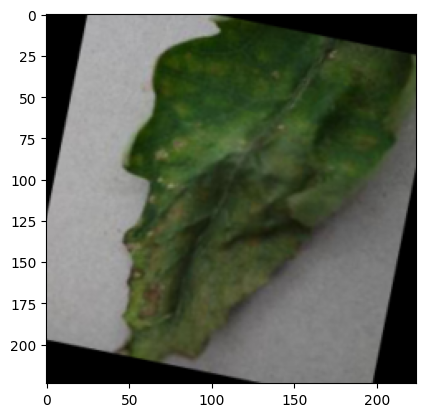

In [ ]:
# Displaying augmented images
xb, yb = next(iter(train_dataloader))
first_image = xb[5]
plt.imshow(first_image.permute(1, 2, 0))
plt.show()

#ResNet
ResNet Architecture: ResNet adds the idea of residual blocks, allowing the model to learn residual mappings rather than the required underlying functions directly. These leftover blocks allow the network to properly propagate gradients while still being able to collect fine-grained data. ResNet topologies often have skip connections that omit one or more layers and a number of residual blocks layered on top of one another.
Plant Disease Detection Using ResNet: A dataset of labelled plant photos is needed in order to perform plant disease detection using ResNet. Examples of both healthy and unhealthy plants, which represent various diseases, should be included in the dataset. After then, the ResNet model is trained on this dataset to discover the patterns and traits linked to various diseases.
The ResNet architecture processes the images while training, teaching the model to classify the photos into the proper illness categories.
Using evaluation measures like accuracy the ResNet-based plant disease detection system's performance is assessed after training.

In [ ]:
#model 1:
resnet34 = models.resnet34()
resnet34 = resnet34.to(device='cuda', dtype=tc.float32)

In [ ]:
#model2 :
resnet50 = models.resnet50()
resnet50 = resnet50.to(device='cuda', dtype=tc.float32)

# Convolution Neural Network
Conv2D is a convolutional layer that is frequently used in deep learning models to analyse images and detect plant diseases. The input image or feature map is subjected to a convolution process, which aids in the extraction of pertinent features and patterns.
Conv2D is often utilised as a component of a convolutional neural network (CNN) architecture in the area of plant disease identification. The Conv2D layer's

primary hyperparameters are listed below:
1. The number of filters (or kernel size) that will be applied to the input image is determined by this option. Different aspects from the input image are captured by each filter. For example, if you set the number of filters to 32, it means that 32 different filters will be applied to the input image, resulting in 32 output feature maps.
2. Kernel size: It establishes the filters' spatial parameters. A tuple (height, width) is typically used to provide the kernel size. For instance, a 3x3 filter is indicated by a kernel size of (3, 3).
3. Strides: When a filter is applied to an input image, its stride controls the size of each step it takes. The filter advances one pixel at a time both horizontally and vertically when the stride value is (1, 1). The output feature map's size can be decreased by increasing the stride value.
4. Padding: To retain spatial information, padding is the inclusion of extra pixels around the input image. The padding options "valid" (which adds no padding) and "same" (which adds padding such that the output feature map has the same spatial dimensions as the input) are both often used.
5. Activation function: An activation function introduces non-linearity into the model. It is applied element-wise to the output of the Conv2D layer. Common activation functions used in CNNs include ReLU (Rectified Linear Unit), sigmoid, and tanh.

Usually, when building a Conv2D layer in a deep learning framework like TensorFlow or PyTorch, these hyperparameters are supplied. The properties of your dataset, the difficulty of the plant disease detection challenge, and the overall design of your CNN model will all influence the precise values for these hyperparameters. To determine the best hyperparameter values for your particular application, experimentation and tuning are frequently required.

sourese of following neural netwwork:<br>
https://github.com/manthan89-py/Plant-Disease-Detection/blob/main/Model/Plant%20Disease%20Detection%20Code.ipynb <br>
we only change its output size to make it ready for training

In [ ]:
#model3:
r = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(32),
    nn.MaxPool2d(2),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(64),
    nn.MaxPool2d(2),
    nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(128),
    nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(128),
    nn.MaxPool2d(2),
    nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(256),
    nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.BatchNorm2d(256),
    nn.MaxPool2d(4),
    nn.Flatten(),
    nn.Linear(in_features=12544, out_features=32),
)
r = r.to(device='cuda', dtype=tc.float32)


In [ ]:
from torch.cuda.amp import GradScaler, autocast

def fit(net, tr_dl, val_dl, loss=nn.CrossEntropyLoss(), epochs=3, lr=3e-3, wd=1e-3):

    Ltr_hist, Lval_hist, Accuracy = [], [] , []

    scaler = GradScaler()  # for mixed-precision training

    opt = tc.optim.AdamW(net.parameters(), lr=lr, weight_decay=wd)
    for epoch in trange(epochs):
        L = []
        dl = iter(tr_dl)
        for xb, yb in tqdm(dl, leave=False):
            xb, yb = xb.cuda(), yb.cuda()
            with autocast():  # for mixed-precision training
                y_ = net(xb)
                l = loss(y_, yb)
            opt.zero_grad()
            scaler.scale(l).backward()  # previously l.backward()
            scaler.step(opt)            # previously opt.step()
            scaler.update()
            L.append(l.detach().cpu().numpy())

        Lval, Aval = [], []
        with tc.no_grad():
            for xb, yb in tqdm(iter(val_dl), leave=False):
                xb, yb = xb.cuda(), yb.cuda()
                with autocast():
                    y_ = net(xb)
                    l = loss(y_, yb)
                Lval.append(l.detach().cpu().numpy())
                Aval.append((y_.max(dim=1)[1] == yb).float().mean().cpu().numpy())

        Ltr_hist.append(np.mean(L))
        Lval_hist.append(np.mean(Lval))
        Accuracy.append(np.mean(Aval))
        print(f'training loss: {np.mean(L):0.4f}\tvalidation loss: {np.mean(Lval):0.4f}\tvalidation accuracy: {np.mean(Aval):0.2f}')
    return Ltr_hist, Lval_hist , Accuracy

In [ ]:
Ltr_hist, Lval_hist, Accuracy = fit(resnet34, train_dataloader, val_dataloader, epochs=4)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 1.9711	validation loss: 1.5073	validation accuracy: 0.55


  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 1.1938	validation loss: 1.0349	validation accuracy: 0.65


  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 0.8902	validation loss: 0.7301	validation accuracy: 0.76


  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 0.7047	validation loss: 0.7235	validation accuracy: 0.76


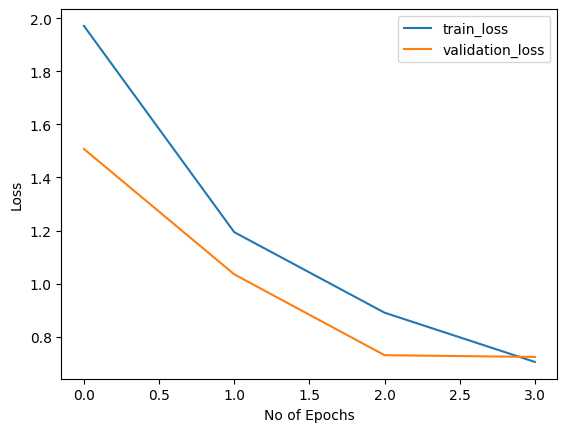

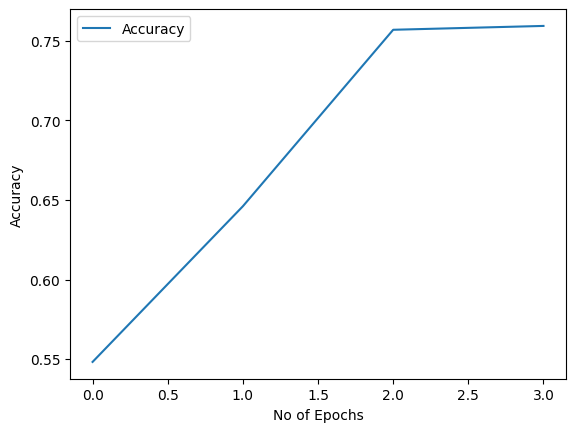

In [ ]:
plt.plot(Ltr_hist , label = 'train_loss')
plt.plot(Lval_hist , label = 'validation_loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(Accuracy , label = 'Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def predict_class(im_path , model  , data_path):
    image = Image.open(im_path )
    image = image.resize((224, 224))
    img_tensor = transform(image).cuda().unsqueeze(0)
    output = model(img_tensor)
    probabilities = tc.nn.functional.softmax(output, dim=1)
    class_names = sorted(os.listdir(data_path))
    predicted_class_index = tc.max(probabilities, dim=1)[1]
    predicted_class_name = class_names[predicted_class_index]
    print("The predicted class name is: ", predicted_class_name)
    show_img(im_path)

The predicted class name is:  Tomato_Early_blight


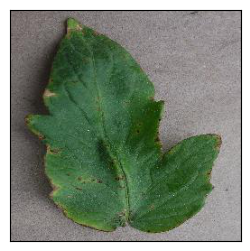

In [ ]:
path='/content/PlantVillage/Tomato_Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG'

predict_class(path , resnet34  , data_dir)

In [ ]:
Ltr_hist_50, Lval_hist_50, Accuracy= fit(resnet50, train_dataloader, val_dataloader, epochs=4)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 1.8608	validation loss: 1.4628	validation accuracy: 0.54


  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 1.2148	validation loss: 1.0639	validation accuracy: 0.64


  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 0.9213	validation loss: 0.8518	validation accuracy: 0.72


  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 0.6984	validation loss: 0.6755	validation accuracy: 0.78


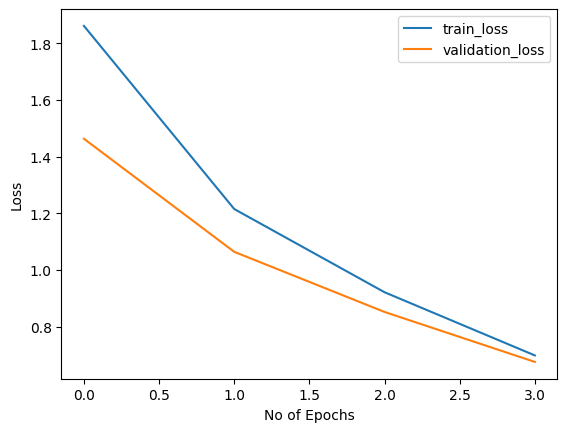

In [ ]:
plt.plot(Ltr_hist_50 , label = 'train_loss')
plt.plot(Lval_hist_50 , label = 'validation_loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

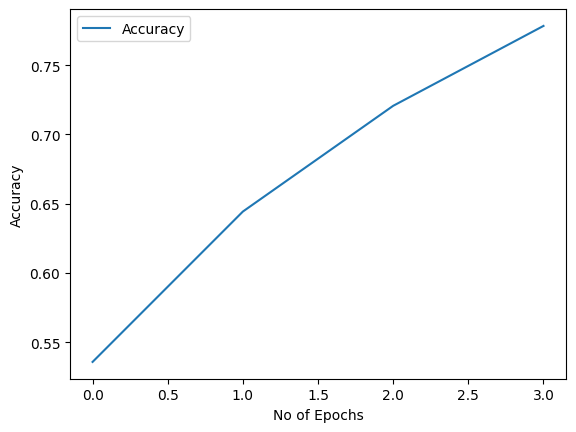

In [ ]:
plt.plot(Accuracy , label = 'Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The predicted class name is:  Tomato_Late_blight


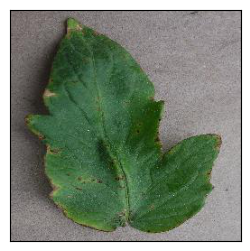

In [ ]:
path='/content/PlantVillage/Tomato_Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG'

predict_class(path , resnet50  , data_dir)

In [ ]:
Ltr_hist_r, Lval_hist_r, Accuracy = fit(r, train_dataloader, val_dataloader, epochs=4)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 4.8171	validation loss: 1.8213	validation accuracy: 0.59


  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 1.4094	validation loss: 1.0677	validation accuracy: 0.68


  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 0.9120	validation loss: 0.8009	validation accuracy: 0.75


  0%|          | 0/516 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

training loss: 0.7497	validation loss: 0.6544	validation accuracy: 0.78


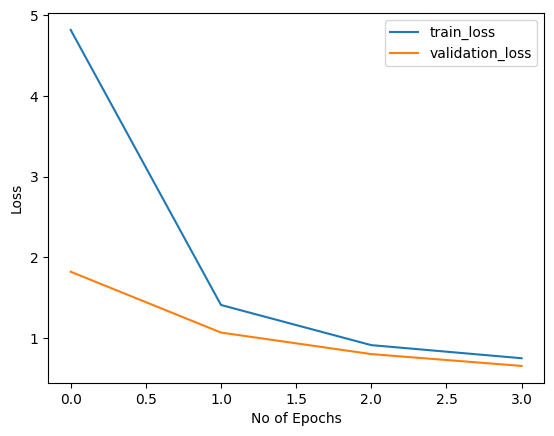

In [ ]:
plt.plot(Ltr_hist_r , label = 'train_loss')
plt.plot(Lval_hist_r , label = 'validation_loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

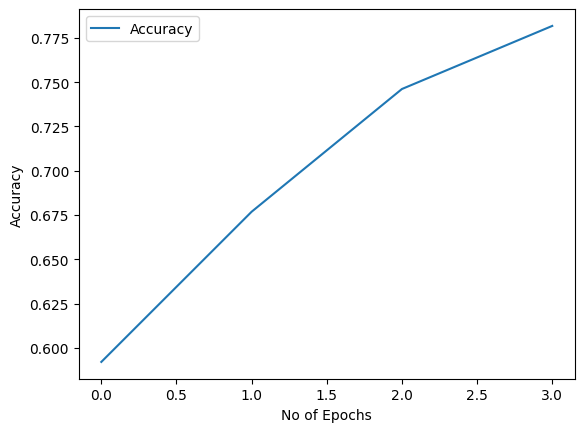

In [ ]:
plt.plot(Accuracy , label = 'Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The predicted class name is:  Potato___Late_blight


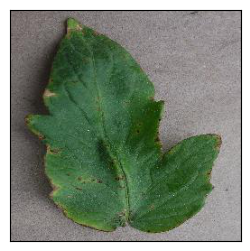

In [ ]:
path='/content/PlantVillage/Tomato_Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG'

predict_class(path , r  , data_dir)

# Object detection using yolov5

A well-known real-time object recognition technique called YOLO (You Only Look Once) seeks to identify and categorise items in an image or video. The fifth iteration of the YOLO algorithm is known as "YOLOv5". It is an enhancement over earlier versions, providing faster and more accurate performance.
In one pass over the input picture or video frame, YOLOv5 performs object detection using a single neural network. The network creates a grid from the input image and predicts bounding boxes and associated class probabilities for each grid cell. The class probabilities show the possibility that each object belongs to a particular class, while the bounding boxes provide the expected positions and dimensions of each object.

YOLOv5 offers a number of improvements over its forerunners, including a redesigned architecture, an enhanced network backbone, and more sophisticated training methods. These enhancements result in faster inference and improved handling of small objects, as well as more accurate object detection. Numerous applications, including robots, autonomous cars, surveillance systems, and image/video analysis, frequently use YOLOv5. It is suitable for activities that call for quick and effective object detection in changing contexts because of its real-time capabilities.

In [ ]:
fname = "PlantDoc.yolov5pytorch.zip"
!gdown https://drive.google.com/uc?id=1_vfPvsSlALiGIStQrgCBk5o1SROMDykZ -O {fname}
!unzip -o {fname}
!rm {fname}

Streaming output truncated to the last 5000 lines.
  inflating: PlantDoc.yolov5pytorch/test/labels/depositphotos_2795312-stock-photo-green-raspberry-leaf_jpg.rf.4fbec138410a4757cd24d579e41b5233.txt  
  inflating: PlantDoc.yolov5pytorch/test/images/strom5_jpg.rf.600aeba910d8c72ecf795bbdc9da9bb5.jpg  
  inflating: PlantDoc.yolov5pytorch/test/labels/stock-photo-blueberry-leaf-closeup-isolated-on-white-306486470_jpg.rf.3b904f08f661d5b48cdf28fa0cbbb843.txt  
  inflating: PlantDoc.yolov5pytorch/test/images/0c_jpg.rf.94d4e676b19456d693ee4e9884deb97f.jpg  
  inflating: PlantDoc.yolov5pytorch/test/images/12-19striprustJIM_jpg.rf.9bd9d615eff85a83de071af972657030.jpg  
  inflating: PlantDoc.yolov5pytorch/test/images/apples_apple-scab_10_zoom_jpg.rf.7c2b060b288344e8699769251e7a80a4.jpg  
  inflating: PlantDoc.yolov5pytorch/test/images/potato-early-blight-alternaria-alternata-lesion-on-a-potato-leaf-a1w1em_jpg.rf.8ee5cc79c23bb4dfd8cd6e4fd489a432.jpg  
  inflating: PlantDoc.yolov5pytorch/test/images

In [ ]:
%cd /content/PlantDoc.yolov5pytorch

/content/PlantDoc.yolov5pytorch


In [ ]:
%cd /content/PlantDoc.yolov5pytorch/yolov5

/content/PlantDoc.yolov5pytorch/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 3), reused 2 (delta 1), pack-reused 0
Unpacking objects: 100% (15/15), 46.19 KiB | 3.85 MiB/s, done.
From https://github.com/ultralytics/yolov5
   c3e4e94..e382d4c  master     -> origin/master
github: ⚠️ YOLOv5 is out of date by 3 commits. Use 'git pull' or 

In [ ]:
!python detect.py --weights runs/train/exp10/weights/best.pt --img 416 --conf 0.25 --source data/images

detect: weights=['runs/train/exp10/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7091035 parameters, 0 gradients, 16.0 GFLOPs
image 1/14 /content/PlantDoc.yolov5pytorch/yolov5/data/images/Tomato-Mosaic-1wdr2jx-300x225_jpg.rf.f0e2325f6e421e8b4717e67cd9dbe5a7.jpg: 416x416 1 Corn Gray leaf spot, 21.5ms
image 2/14 /content/PlantDoc.yolov5pytorch/yolov5/data/images/Tomato59_JPG_jpg.rf.66c6ae528d889ed81a8c5bc2497b7bff.jpg: 416x416 4 Tomato leaf bacterial spots, 18.5ms
image 3/14 

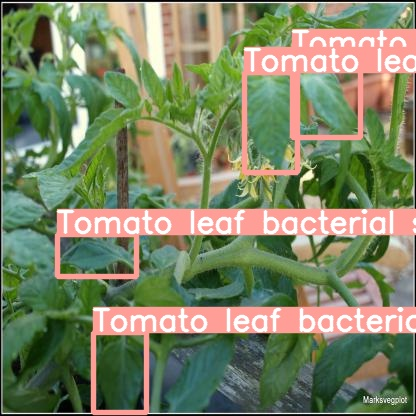

In [ ]:
#Plotting the predicted classes using object detection
imgs(filename='runs/detect/exp8/1.jpg',width=416)

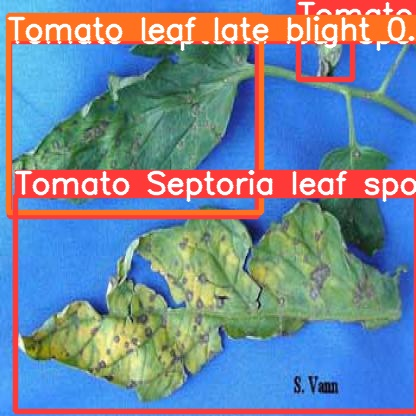

In [ ]:
imgs(filename='runs/detect/exp8/2.jpg',width=416)

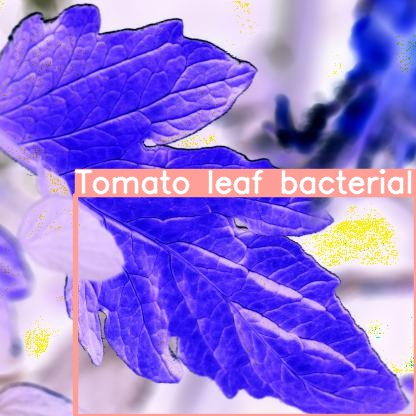

In [ ]:
imgs(filename='runs/detect/exp8/3.jpg',width=416)

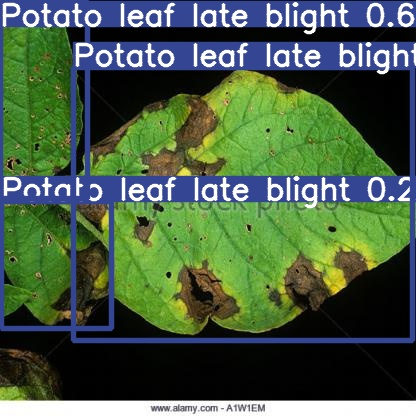

In [ ]:
imgs(filename='runs/detect/exp8/4.jpg',width=416)

<font size="+4"><b>3. Spot detection:</b><br></font>

<font size="+1">
<b>steps:</b><br>
1. select the suitable images containing spot from the main dataset<br>  
2. augment them by drawing drawing bounding box around them <br>
3. convert them into VOC format<br>
4. define a function to extract the images and their XML files as tensot.<br>
5. add some transformed images to training dataset.<br>
6. train the model using resnet34.<br>
7. Visualisation<br>
8. evaluate the model<br>
<b> </b>
   
</font>

In [ ]:
%cd /content

/content


In [ ]:
!gdown https://drive.google.com/file/d/1-iMWTj510Bjsa1SrfBzAtcCMg3ek0NX3/view?usp=share_link

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1-iMWTj510Bjsa1SrfBzAtcCMg3ek0NX3
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1-iMWTj510Bjsa1SrfBzAtcCMg3ek0NX3/view?usp=share_link
To: /content/view?usp=share_link
73.9kB [00:00, 42.0MB/s]


In [ ]:
fname = "spot.zip"
!gdown  https://drive.google.com/uc?id=1-iMWTj510Bjsa1SrfBzAtcCMg3ek0NX3 -O {fname}
!unzip -o {fname}
!rm {fname}

Downloading...
From: https://drive.google.com/uc?id=1-iMWTj510Bjsa1SrfBzAtcCMg3ek0NX3
To: /content/spot.zip
100% 4.82M/4.82M [00:00<00:00, 68.1MB/s]
Archive:  spot.zip
  inflating: train/-100-_JPG.rf.d25d80fa45af8c9feb31ce5b86eb7aa4.jpg  
  inflating: train/-100-_JPG.rf.d25d80fa45af8c9feb31ce5b86eb7aa4.xml  
  inflating: train/-101-_JPG.rf.dfd79aa788e23aba12674bc5dd31b467.jpg  
  inflating: train/-101-_JPG.rf.dfd79aa788e23aba12674bc5dd31b467.xml  
  inflating: train/-104-_JPG.rf.fb7be9c35d5c446048ff3d2f8f2d5c8b.jpg  
  inflating: train/-104-_JPG.rf.fb7be9c35d5c446048ff3d2f8f2d5c8b.xml  
  inflating: train/-105-_JPG.rf.8b8fb22f64149f75a6c91da14d890204.jpg  
  inflating: train/-105-_JPG.rf.8b8fb22f64149f75a6c91da14d890204.xml  
  inflating: train/-106-_JPG.rf.c19ca9f6e1bc844bcb4b466ff7e879ee.jpg  
  inflating: train/-106-_JPG.rf.c19ca9f6e1bc844bcb4b466ff7e879ee.xml  
  inflating: train/-107-_JPG.rf.a2584bf9323677f382d6ff8646b933fc.jpg  
  inflating: train/-107-_JPG.rf.a2584bf9323677f382d

In [ ]:
train_dir= '/content/train'
val_dir= '/content/valid'

In [ ]:
imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

def one_epoch(net, loss, dl, opt=None, metric=None):

    if opt: net.train()  # only affects some layers
    else:   net.eval()

    L, M = [], []
    dl_it = iter(dl)
    for xb, yb in tqdm(dl_it, leave=False):
        xb = xb.cuda()
        if not isinstance(yb, list): yb = [yb]  # this is new(!)
        yb = [yb_.cuda() for yb_ in yb]

        if opt:
            y_ = net(xb)
            l = loss(y_, yb)
            opt.zero_grad()
            l.backward()
            opt.step()
        else:
            with tc.no_grad():
                y_ = net(xb)
                l = loss(y_, yb)
        L.append(l.detach().cpu().numpy())
        if isinstance(metric, list):
            for m in metric:
                M.append(m(tc.sigmoid(y_), yb[0]))

        elif metric:
            M.append(metric(tc.sigmoid(y_), yb[0]))
    return L, M


def fit(net, tr_dl, val_dl, loss=nn.CrossEntropyLoss(), epochs=3, lr=3e-3, wd=1e-3, plot=True):

    opt = tc.optim.Adam(net.parameters(), lr=lr, weight_decay=wd)

    Ltr_hist, Lval_hist = [], []
    for epoch in trange(epochs):
        Ltr,  _    = one_epoch(net, loss, tr_dl,  opt)
        Lval, Aval = one_epoch(net, loss, val_dl, None, batch_iou)
        Ltr_hist.append(np.mean(Ltr))
        Lval_hist.append(np.mean(Lval))
        print(f'epoch: {epoch}\ttraining loss: {np.mean(Ltr):0.4f}\tvalidation loss: {np.mean(Lval):0.4f}, overlap accuracy: {np.array(Aval).mean():0.2f}')

    # plot the losses
    if plot:
        _,ax = plt.subplots(1,1,figsize=(16,4))
        ax.plot(1+np.arange(len(Ltr_hist)),Ltr_hist)
        ax.plot(1+np.arange(len(Lval_hist)),Lval_hist)
        ax.grid('on')
        ax.set_xlim(left=1, right=len(Ltr_hist))
        ax.legend(['training loss', 'validation loss']);

    return Ltr_hist, Lval_hist


def denorm(x, stats=imagenet_stats):
    return x * tc.Tensor(stats[1])[:,None,None] + tc.Tensor(stats[0])[:,None,None]

transform = transforms.Compose([
    transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)], p=1),
    transforms.ToTensor()])


def draw_rect(ax, xy, w, h):
    patch = ax.add_patch(patches.Rectangle(xy, w, h, fill=False, edgecolor='yellow', lw=2))
    patch.set_path_effects([patheffects.Stroke(linewidth=6, foreground='black'), patheffects.Normal()])


<font size="+2"><b>Intersection over Union(IOU):</b></font><br>
<font size="+1">
To evaluate the accuracy of an spot detection model,<br>
we defined Intersection over Union function <br>
to compute the overlap area between the two true and predicted boundig boxes. <br>
then take the mean of these values to obtain an overall measure of the model's accuracy.[2]
<br>
source of following code:
https://www.kaggle.com/code/vbookshelf/keras-iou-metric-implemented-without-tensor-drama

In [ ]:
def calculate_iou(box_true, box_pred):
    x1_tr, y1_tr, w_tr, h_tr = box_true
    x1_pr, y1_pr, w_pr, h_pr = box_pred

    intersection_x1 = max(x1_tr, x1_pr)
    intersection_y1 = max(y1_tr, y1_pr)
    intersection_x2 = min(x1_tr + w_tr, x1_pr + w_pr)
    intersection_y2 = min(y1_tr + h_tr, y1_pr + h_pr)

    intersection_w = max(0, intersection_x2 - intersection_x1)
    intersection_h = max(0, intersection_y2 - intersection_y1)
    intersection_area = intersection_w * intersection_h

    area_true = w_tr * h_tr
    area_pred = w_pr * h_pr
    union_area = area_true + area_pred - intersection_area

    iou = intersection_area / union_area

    return iou



def batch_iou(box_true_batch, box_pred_batch):
    iou_list = []
    for box_true, box_pred in zip(box_true_batch, box_pred_batch):
        iou = calculate_iou(box_true, box_pred)
        iou_list.append(iou.item())
        iou_array = np.array(iou_list).mean()

    return iou_array

## to create the following class we get the idea from this source:
<br>https://github.com/vijendra1125/Custom-Mask-RCNN-Using-Tensorfow-Object-Detection-API/blob/master/supporting_scripts/create_mask_rcnn_tf_record.py
<br>

in this class we first to read images form jpg and xml files,get the Xmin,Ymin ,Xmax,Ymax convert them to Xmin,Ymin,w,h and then convert them to tensor

In [ ]:

class Data2tensor(Dataset):
    def __init__(self, d_dir, transforms=None):
        self.d_dir = d_dir   # directory
        self.transforms = transforms

        self.img_paths = []
        self.xml_paths = []

        # read images and XML files with the same name
        for file in os.listdir(d_dir):
            name, extention = os.path.splitext(file)   #split the name and extention
            if extention == ".jpg":
                img_path = os.path.join(d_dir, file)
                xml_path = os.path.join(d_dir, name + ".xml")
                if os.path.isfile(xml_path):
                    self.img_paths.append(img_path)
                    self.xml_paths.append(xml_path)

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        xml_path = self.xml_paths[idx]

        # Load images and XML
        img = Image.open(img_path)
        img = img.convert("RGB")
        w,h = img.size
        roots = ET.parse(xml_path).getroot()   #read XML using ElementTree



        # Extract bounding boxes from xml files
        bboxes = []
        for obj in roots.findall("object"):
            bbox = obj.find("bndbox")
            xmin = int(bbox.find("xmin").text)
            ymin = int(bbox.find("ymin").text)
            xmax = int(bbox.find("xmax").text)
            ymax = int(bbox.find("ymax").text)

             # convert 2 last contents to w ,h
            y_bbox = np.array([xmin, ymin, xmax, ymax])
            y_bbox = y_bbox / np.array([w,h,w,h])
            y_bbox = [*y_bbox[:2], *(y_bbox[2:]-y_bbox[:2])]
            bboxes.append(y_bbox)


         # Applying transforms
        if self.transforms:   img = self.transforms(img)
        else:                  img = to_tensor(img)

        bboxes = [tc.tensor(bbox, dtype=tc.float32) for bbox in bboxes]  # Convert them tensor
        return img, bboxes


<font size="+1">
 In order to address the insufficient amount of augmented images,<br>
    we need to train the model on different portions of the available training data and evaluate its performance.<br>
This can be done by altering the value of <code>p</code> in the following code:

</font>


In [ ]:
def ds_train_val(train_dir, val_dir, p , transforms):
    ds_full = Data2tensor(train_dir, transforms)
    num_data = len(ds_full)
    num_train = math.ceil(num_data * p)
    train_indices = list(range(num_train))
    ds_tr = Subset(ds_full, train_indices)

    ds_val = Data2tensor(val_dir, None)

    return ds_tr, ds_val

In [ ]:
ds_tr0, ds_val =ds_train_val(train_dir, val_dir, p=1, transforms=transform)

In [ ]:
from PIL import Image
def show_img_and_bbox(x, y, ax=None):
    # plot the image:
    if not ax: _, ax = plt.subplots(1, 1, figsize=(5, 5))
    if len(x.shape) == 3:
        H,W = x.shape[1:]
        x = x.numpy().transpose(1, 2, 0)
    ax.imshow(x)
    ax.axis('off')

    # showing bounding box
    bbox = y
    x, y, w, h = bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]
    draw_rect(ax, [x*W, y*H], x*W+ w*W, y*H+h*H)

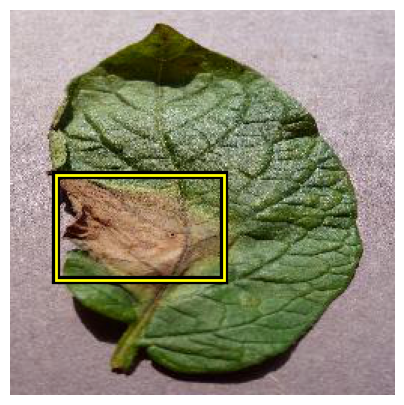

In [ ]:
x, y= ds_tr0[3]
show_img_and_bbox(x, y[0])

<font size="+2"><b>add some transformed images to train dataset:</b></font>

In [ ]:
from torch.utils.data import ConcatDataset

transform1 = transforms.Compose([
    transforms.RandomApply([transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)], p=1),
    transforms.ToTensor()])

transform2 = transforms.Compose([
    transforms.RandomApply([transforms.ColorJitter(brightness=0.4, contrast=0.5, saturation=0.2, hue=0.1)], p=1),
    transforms.ToTensor()])

# whole dataset train:
ds_tr ,_ = ds_train_val(train_dir, val_dir, p=1, transforms=None)

# Transform 40% of train data set and concatenate to itself
transf_ds1 ,_ = ds_train_val(train_dir, val_dir, p=0.4, transforms=transform1)
ds_tr1 = ConcatDataset([ds_tr, transf_ds1])

# Transform 40% of train data set and concatenate to itself
transf_ds2, _ = ds_train_val(train_dir, val_dir, p=0.4, transforms=transform2)
transformed_ds_tr = ConcatDataset([ds_tr1, transf_ds2])

<font size="+2"><b>data shapes for train and val sets:</b></font><br><br>
<font size="+1"> we only use 500 for batch just to show the number of dataset not for training<br>
we have Thee dataset:<br>
    1. train dataset (256) + train_transformed1(88) + train_transformed2(88) = <b>432</b><br>
    2. train dataset <b>(256)</b><br>
    3. validation dataset <b>(45)</b><br></font>
    
 <font size="+1"><b>As the images are augmented with bounding boxes we ignore rotation, padding and zooming in our transformation</b></font>

In [ ]:
bs = 500

train_and_transformed  = DataLoader(transformed_ds_tr,  batch_size=bs,   shuffle=True,  num_workers=0)
train_dl  = DataLoader(ds_tr,  batch_size=bs,   shuffle=True,  num_workers=0)
val_dl  = DataLoader(ds_val,  batch_size=2*bs,   shuffle=True,  num_workers=0)

xt,yt = next(iter(train_and_transformed))
xb,yb = next(iter(train_dl))
x_v , y_v = next(iter(val_dl))

#xb.shape ,yb[0].shape,  x_v.shape ,y_v[0].shape

print(f"Train and transformed data:  x shape = {xt.shape}, bbox shape = {yt[0].shape} \n")
print(f"Training data:  image shape = {xb.shape}, bbox shape = {yb[0].shape} \n")
print(f"Validation data: image shape = {x_v.shape}, bbox shape = {y_v[0].shape}")


Train and transformed data:  x shape = torch.Size([432, 3, 256, 256]), bbox shape = torch.Size([432, 4]) 

Training data:  image shape = torch.Size([240, 3, 256, 256]), bbox shape = torch.Size([240, 4]) 

Validation data: image shape = torch.Size([45, 3, 256, 256]), bbox shape = torch.Size([45, 4])


<font size="+3"><b>training the model:</b></font><br>
<font size="+1">resnet34 is chosen for training the model


In [ ]:
md_full = models.resnet34()
num_ftrs = md_full.fc.in_features
md_full.fc = nn.Linear(num_ftrs, 4)

In [ ]:
def myloss(y, y_b, reduction='mean'):
    inp_reg = y

    tar_reg = y_b[0]  # extract target tensor from the list
    loss_reg = F.mse_loss(1.2*tc.sigmoid(inp_reg)- 0.1 , tar_reg, reduction=reduction)  # regression loss
    if reduction == 'none': loss_reg = loss_reg.mean(dim=-1)
    return loss_reg

In [ ]:
bs = 32

train_and_transformed  = DataLoader(transformed_ds_tr,  batch_size=bs,   shuffle=True,  num_workers=0)
train_dl  = DataLoader(ds_tr0,  batch_size=bs,   shuffle=True,  num_workers=0)
val_dl  = DataLoader(ds_val,  batch_size=bs,   shuffle=True,  num_workers=0)

<font size="+2"><b>first train the model on training dataset without transformation:</b></font>

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 0	training loss: 0.1097	validation loss: 0.1404, overlap accuracy: 0.01


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 1	training loss: 0.0434	validation loss: 0.1896, overlap accuracy: 0.00


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 2	training loss: 0.0464	validation loss: 0.0304, overlap accuracy: 0.11


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 3	training loss: 0.0420	validation loss: 0.0541, overlap accuracy: 0.09


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 4	training loss: 0.0359	validation loss: 0.0392, overlap accuracy: 0.10


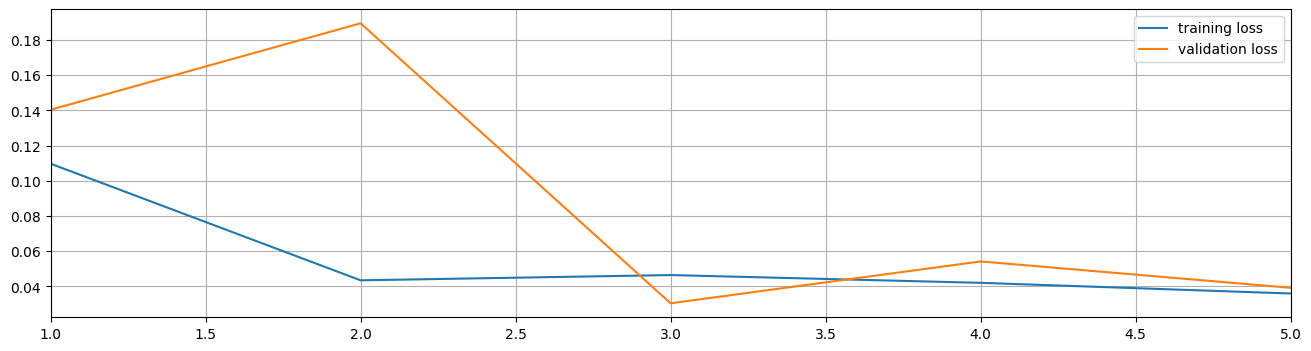

In [ ]:
fit(md_full.cuda(), train_dl, val_dl, loss=myloss, epochs=5, wd=1e-3, lr=0.003);

<font size="+2"><b>now trian the model on train and transformed dataset:</b></font>

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 0	training loss: 0.1219	validation loss: 0.0406, overlap accuracy: 0.12


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 1	training loss: 0.0600	validation loss: 0.0363, overlap accuracy: 0.11


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 2	training loss: 0.0369	validation loss: 0.0256, overlap accuracy: 0.12


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 3	training loss: 0.0290	validation loss: 0.0262, overlap accuracy: 0.09


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 4	training loss: 0.0251	validation loss: 0.0279, overlap accuracy: 0.10


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 5	training loss: 0.0248	validation loss: 0.0292, overlap accuracy: 0.11


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

epoch: 6	training loss: 0.0248	validation loss: 0.0282, overlap accuracy: 0.11


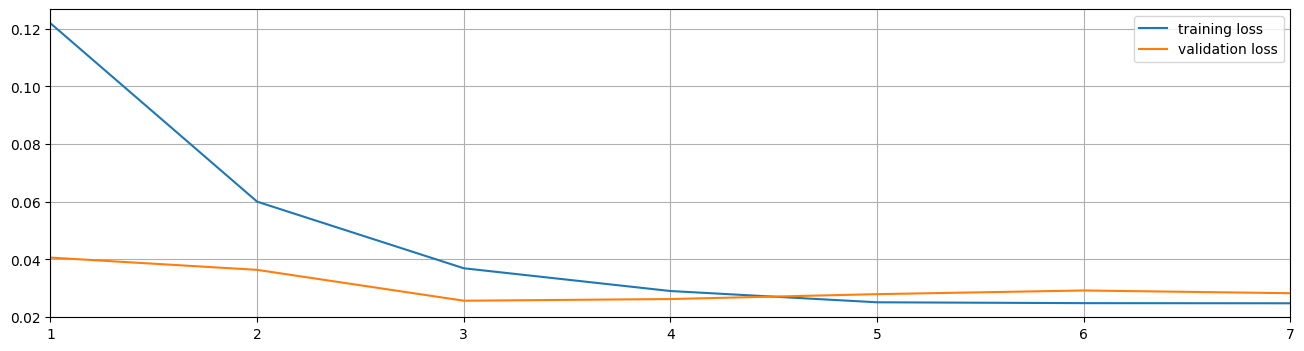

In [ ]:
fit(md_full.cuda(), train_and_transformed, val_dl, loss=myloss, epochs=7, wd=1e-3, lr=0.02);

<font size="+3"><b>Visualisation:</b></font><br>
<font size="+1">To monitor the performance of trained model, we plot a total of 20 image pairs consisting of predicted and actual images with their  bounding boxes.

In [ ]:
def get_preds(net, dl, with_x=False):
    Y_ = []
    X = []
    Y = []
    net.eval()
    dl_it = iter(dl)
    for xb, yb in tqdm(dl_it, leave=False):
        xb = xb.to(net.conv1.weight.device)  # Move input tensor to the same device as the network's parameters
        with tc.no_grad():
            y_ = net(xb)
        Y_.append(y_.detach().cpu())
        Y.append(yb[0])
        if with_x: X.append(xb.detach().cpu())
    Y_ = tc.cat(Y_)
    Y = tc.cat(Y)
    if with_x: X = tc.cat(X)
    net.train()
    return (X, Y, Y_)# if with_x else (Y, Y_)

In [ ]:
X,Y ,Y_ = get_preds(md_full, val_dl, with_x=True)
#Y.shape ,
Y_[12].shape, X[12].shape
print(f"input bbox: {Y[12]} , ouyput bbox:  {Y_[12]}")
Y_= sigmoid_Y_ = tc.sigmoid(Y_)

  0%|          | 0/2 [00:00<?, ?it/s]

input bbox: tensor([0.4844, 0.0859, 0.3438, 0.3828]) , ouyput bbox:  tensor([-0.5263, -0.9669, -0.6850, -0.7040])


In [ ]:
def show_results(Y_, Y, X ,cnt):
    _, ax = plt.subplots(cnt, 2, figsize=(10, 4*cnt))
    for ix in range(cnt):

        show_img_and_bbox(X[ix], Y[ix], ax=ax[ix, 0])
        show_img_and_bbox(X[ix], Y_[ix], ax=ax[ix, 1])

In [ ]:
show_results(Y_, Y, X ,20)

Output hidden; open in https://colab.research.google.com to view.

<font size="+3"><b>occlusions:</b></font><br>
<font size="+1">
To visualise which areas of a picture contribute most to a trained model's prediction, the occlusion method is employed.

  0%|          | 0/18 [00:00<?, ?it/s]

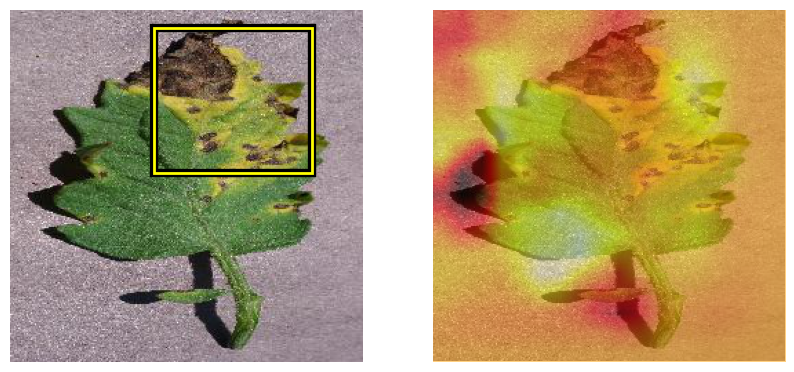

In [ ]:
def occlude(x, occ_sz=32, occ_stride=16):
    h,w = x.shape[1:]
    hm = []
    for r in trange(0, w, occ_stride-1):
        hm_r = []
        for c in range(0, h, occ_stride-1):
            x_cpy = x.clone()
            x_cpy[:, r:r+occ_sz, c:c+occ_sz] = 0.5
            out = md_full(x_cpy[None,...].cuda())
            hm_r.append(out[0].mean().item())
        hm.append(hm_r)
    return np.array(hm)


def show_heatmap(x, hm, ax=None):
    if not ax:
        fig, ax = plt.subplots()
    ax.imshow(x.numpy().transpose(1, 2, 0))
    ax.imshow(hm, alpha=0.5, extent=(0, x.shape[2], x.shape[1], 0), interpolation='bilinear', cmap='hot')
    ax.axis('off')
    plt.show()

def show_image_with_heatmap(x, bbox, hm=None):
    if hm is None: hm= occlude(x, occ_sz=32, occ_stride=16)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    show_img_and_bbox(x, bbox, ax=ax[0])
    show_heatmap(x, hm ,ax=ax[1])
    plt.show()


show_image_with_heatmap(X[4], bbox=Y[4])

<font size="+2"><b>Activation maps and GradCAM:</b></font><br><br>
<font size="+1">
The Grad-CAM technique uses the gradients of "spot" on a leaf to determine the important regions of the image needed to predict as object[1]
</font>

In [ ]:
class RegisterHook(object):

    out = None

    def get_hook_fn(self):
        def fn(m, inp, out): self.out = out
        return fn

    def __init__(self, m, fwd=True):
        self.m, self.fwd = m, fwd

    def __enter__(self):
        hook_fn = self.get_hook_fn()
        if self.fwd: self.h = self.m.register_forward_hook(hook_fn)
        else:        self.h = self.m.register_backward_hook(hook_fn)
        return self

    def __exit__(self, type, value, traceback):
        self.h.remove()

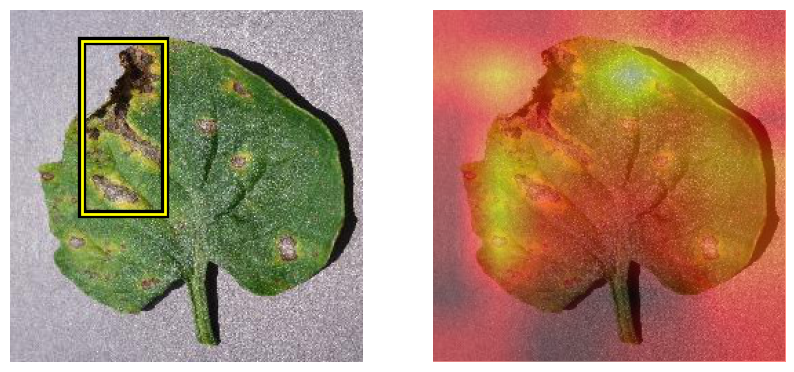

In [ ]:
with RegisterHook(md_full.layer4, fwd=True) as fhk:
    md_full(X[10][None,...].cuda())
    h = fhk.out.mean(dim=1).detach().squeeze().cpu().numpy()
    show_image_with_heatmap(X[10], bbox=Y[10], hm=h)

<font size="+3"><b>overlap evaluation for Spot Detection:</b><br></font>

<font size="+1">
to show the performance of model:<br><br>   
1. use small portion of dataset (e.g., 10%)<br>
2. train the model to compute the average overlap accuracy across all images in the val set.<br>
3. Repeat steps 1-2 for increasing fractions of your dataset (e.g., 20%, 30%, etc.).<br>
4. Plot the overlap accuracy vs the proportion of the data used for training.<br><br>
<b>It should be noted that the additional 50% shown in the following figure (1.5)  corresponds to the 176 transformed images which had been added to the dataset. </b><br>   
</font>

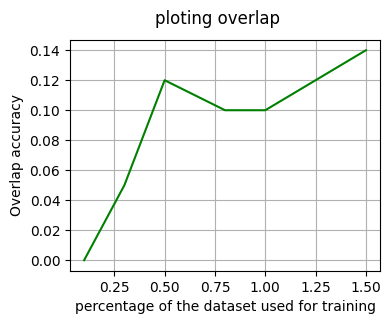

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 3

data_portion = [0.1,  0.3,   0.5,   0.8, 1,  1.5]
ovrlap = [0, 0.05 ,0.12, 0.1 ,0.1, 0.14]

fig, (ax1) = plt.subplots()

ax1.plot(data_portion, ovrlap, 'g')
ax1.set_ylabel('Overlap accuracy')
ax1.set_xlabel('percentage of the dataset used for training')
ax1.grid(True)


fig.suptitle('ploting overlap ')
plt.show()

<font size="+2"><b>It is obvious that the model performs better when there are more images in the dataset.</b></font>

<font size="+2"><b>References:</b></font><br>
<font size="+1">
<br>
[1] Selvaraju, R. R., Cogswell, M., Das, A., Vedantam, R., Parikh, D. and Batra, D., 2016. Grad-CAM: Visual explanations from deep networks via Gradient-based localization. arXiv [cs.CV] [online]. Available from: http://arxiv.org/abs/1610.02391 [Accessed 10 May 2023].
<br>
[2] Zhou, D., Fang, J., Song, X., Guan, C., Yin, J., Dai, Y. and Yang, R., 2019. IoU loss for 2D/3D object detection. In: 2019 International Conference on 3D Vision (3DV). IEEE, 85–94.<br>



</font>
